#IMPORT IMPORTANT LIBRARIES

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,mean_squared_error,r2_score
import xgboost
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

#Load the Data

In [3]:
df = pd.read_csv('loan_detection.csv')
df

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
41184,46,1,999,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


#EDA Performing on data

In [7]:
dp = pd.DataFrame(df)
dp

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
41184,46,1,999,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [9]:
df.columns

Index(['age', 'campaign', 'pdays', 'previous', 'no_previous_contact',
       'not_working', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon'

In [13]:
df.nunique()

age                              78
campaign                         42
pdays                            27
previous                          8
no_previous_contact               2
not_working                       2
job_admin.                        2
job_blue-collar                   2
job_entrepreneur                  2
job_housemaid                     2
job_management                    2
job_retired                       2
job_self-employed                 2
job_services                      2
job_student                       2
job_technician                    2
job_unemployed                    2
job_unknown                       2
marital_divorced                  2
marital_married                   2
marital_single                    2
marital_unknown                   2
education_basic.4y                2
education_basic.6y                2
education_basic.9y                2
education_high.school             2
education_illiterate              2
education_professional.cours

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int64
 1   campaign                       41188 non-null  int64
 2   pdays                          41188 non-null  int64
 3   previous                       41188 non-null  int64
 4   no_previous_contact            41188 non-null  int64
 5   not_working                    41188 non-null  int64
 6   job_admin.                     41188 non-null  int64
 7   job_blue-collar                41188 non-null  int64
 8   job_entrepreneur               41188 non-null  int64
 9   job_housemaid                  41188 non-null  int64
 10  job_management                 41188 non-null  int64
 11  job_retired                    41188 non-null  int64
 12  job_self-employed              41188 non-null  int64
 13  job_services    

In [16]:
df.isnull().sum()

age                              0
campaign                         0
pdays                            0
previous                         0
no_previous_contact              0
not_working                      0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_divorced                 0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.4y               0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university

In [19]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

In [20]:
df.shape

(41188, 60)

#OUTLIERS AND ANAMALIES

************************************age****************************************


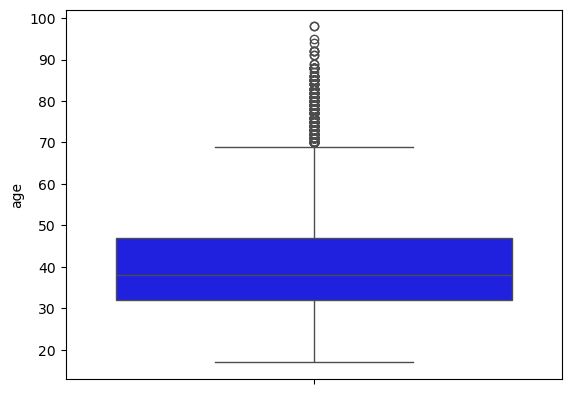

************************************campaign****************************************


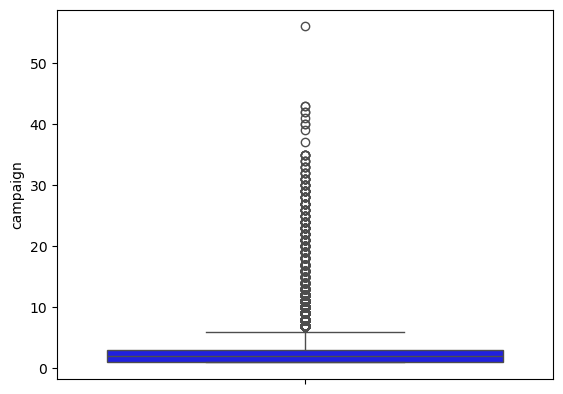

************************************pdays****************************************


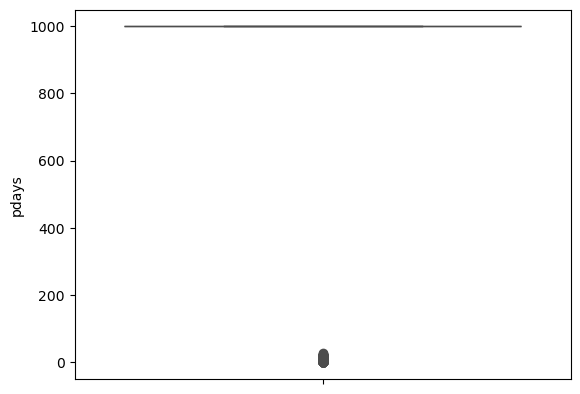

************************************previous****************************************


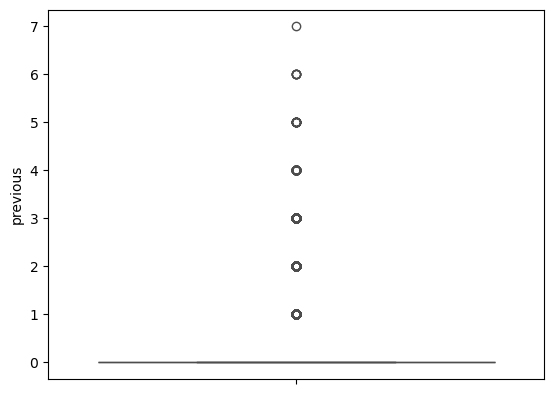

************************************no_previous_contact****************************************


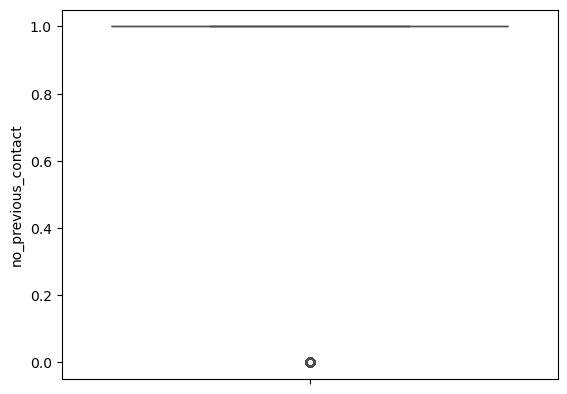

************************************not_working****************************************


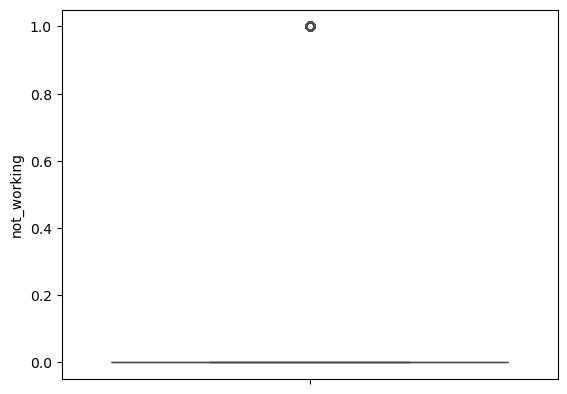

************************************job_admin.****************************************


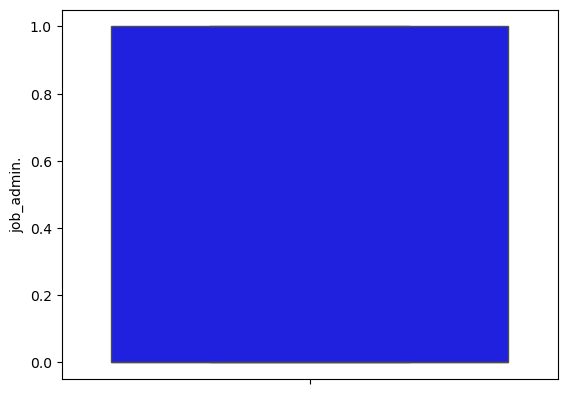

************************************job_blue-collar****************************************


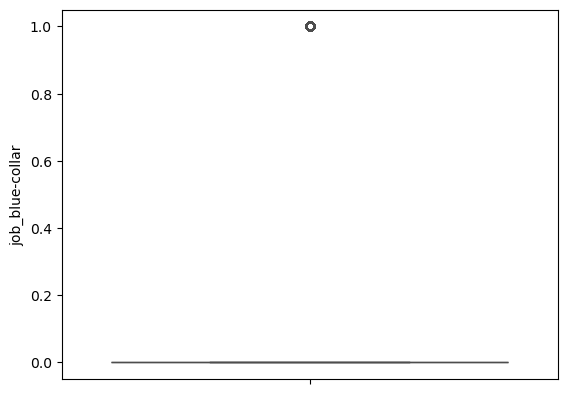

************************************job_entrepreneur****************************************


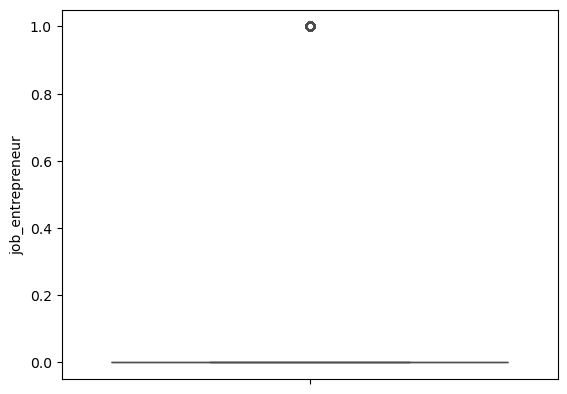

************************************job_housemaid****************************************


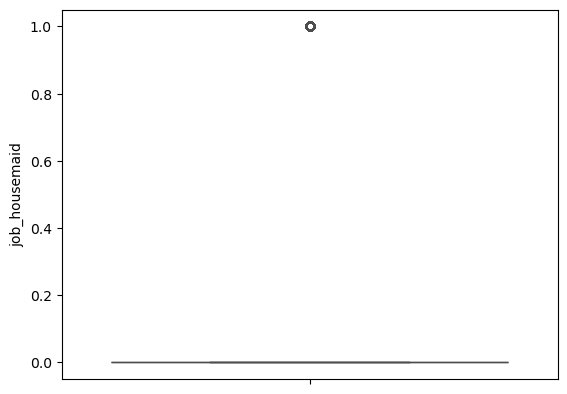

************************************job_management****************************************


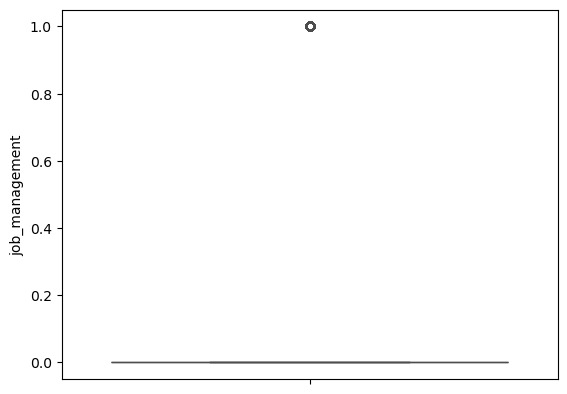

************************************job_retired****************************************


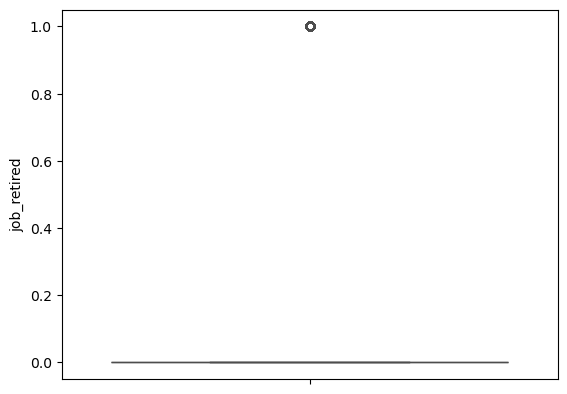

************************************job_self-employed****************************************


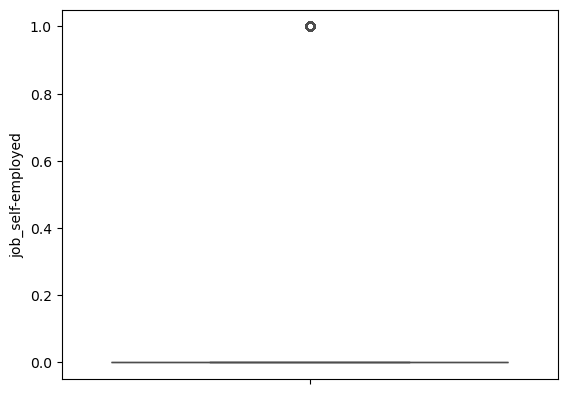

************************************job_services****************************************


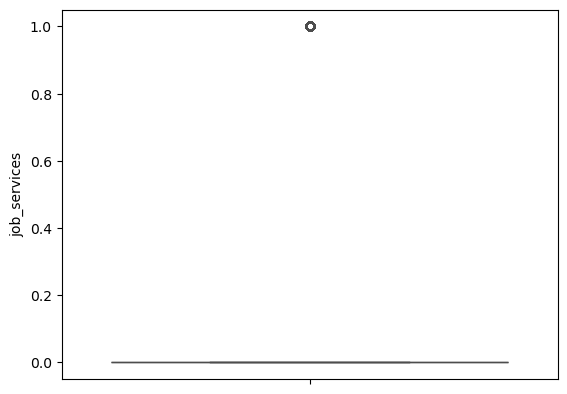

************************************job_student****************************************


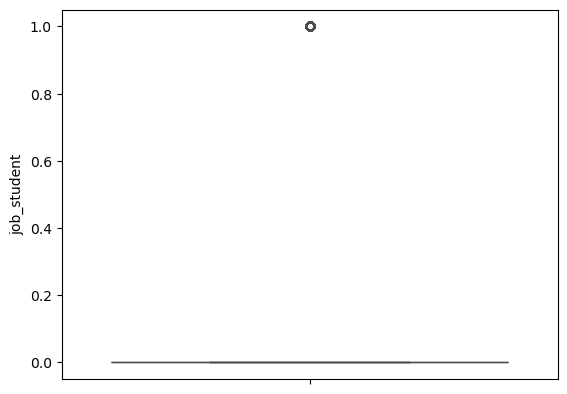

************************************job_technician****************************************


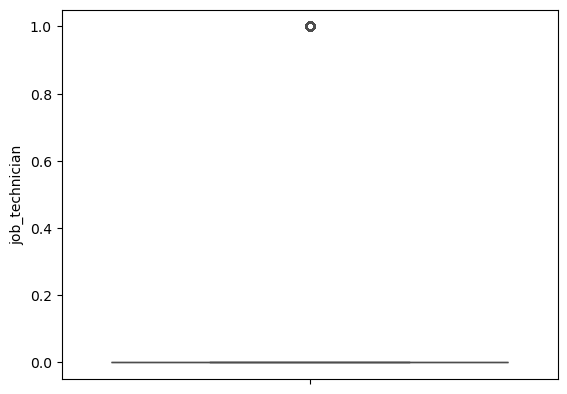

************************************job_unemployed****************************************


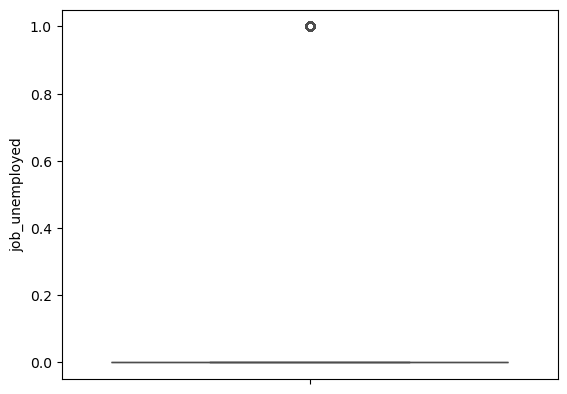

************************************job_unknown****************************************


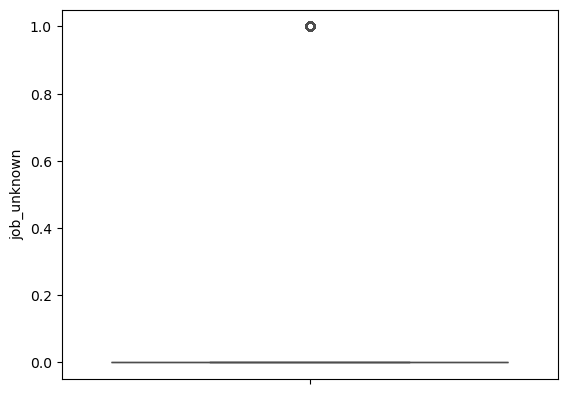

************************************marital_divorced****************************************


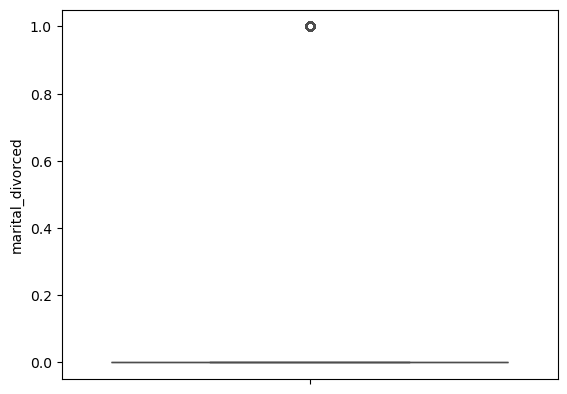

************************************marital_married****************************************


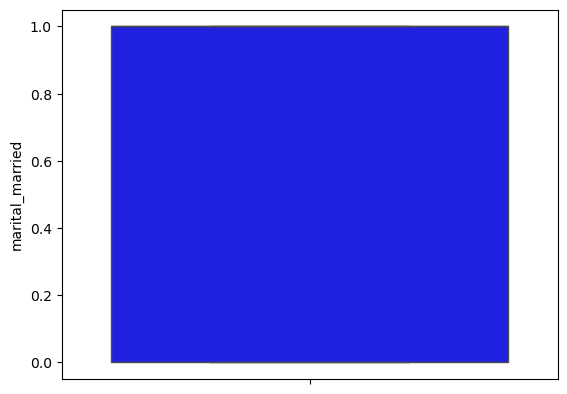

************************************marital_single****************************************


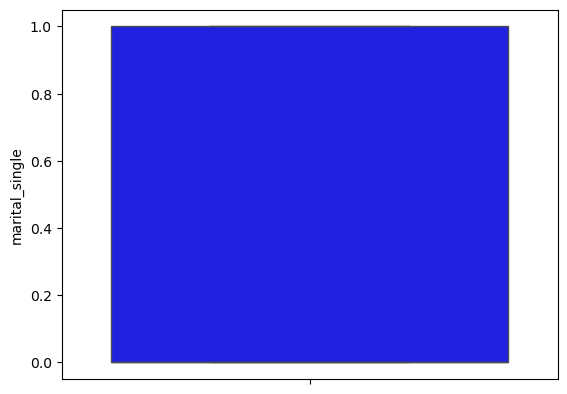

************************************marital_unknown****************************************


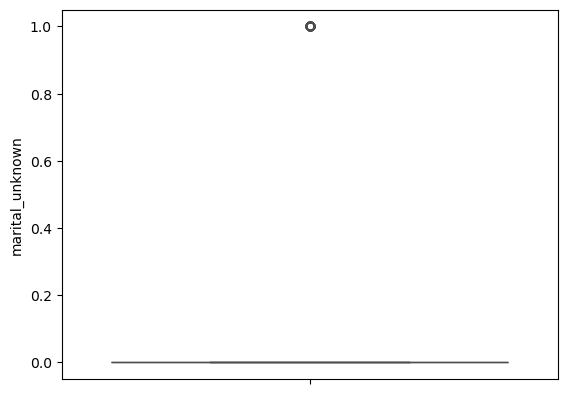

************************************education_basic.4y****************************************


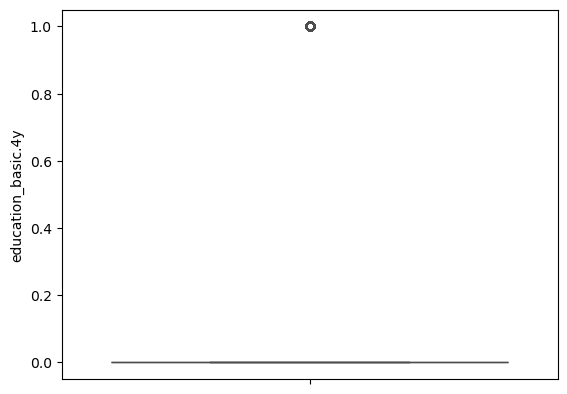

************************************education_basic.6y****************************************


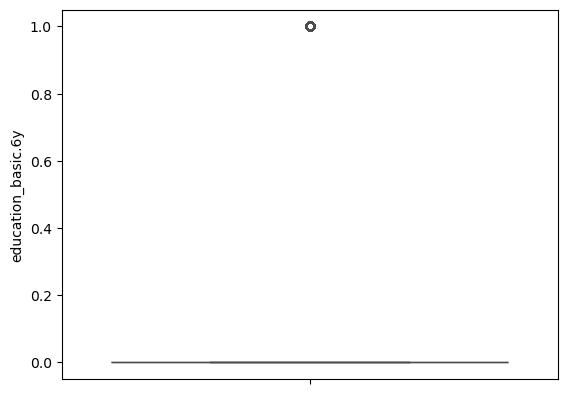

************************************education_basic.9y****************************************


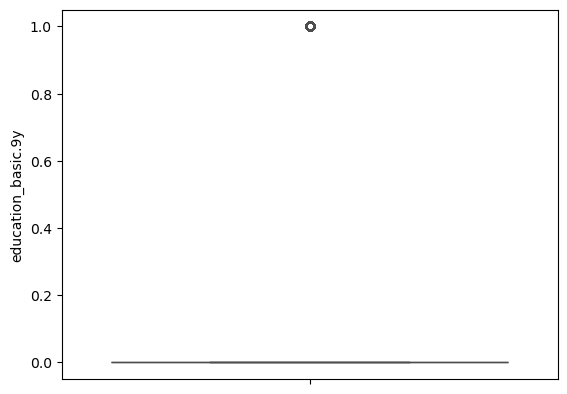

************************************education_high.school****************************************


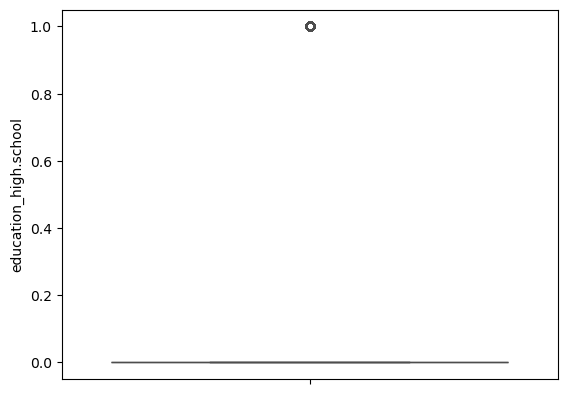

************************************education_illiterate****************************************


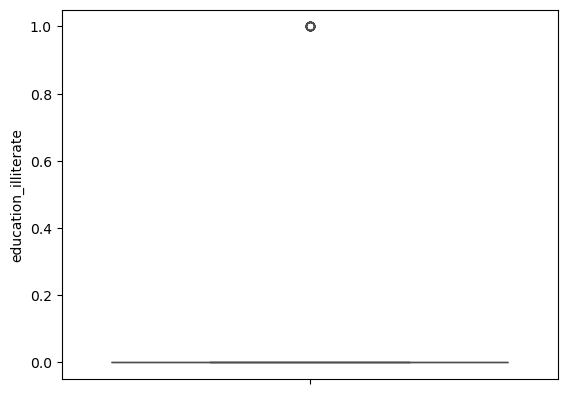

************************************education_professional.course****************************************


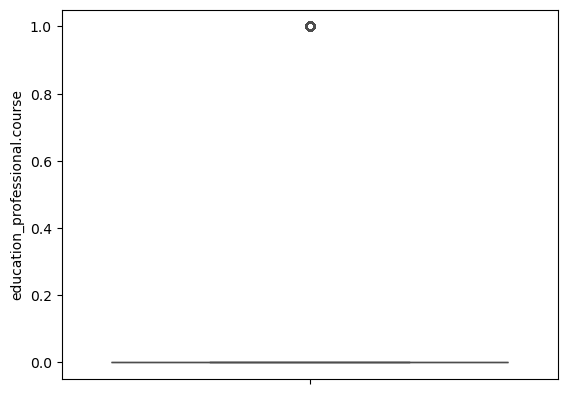

************************************education_university.degree****************************************


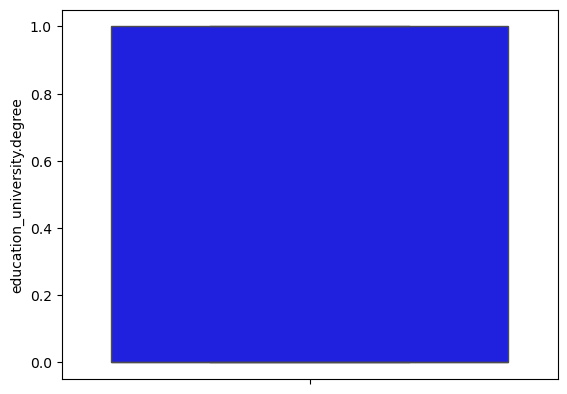

************************************education_unknown****************************************


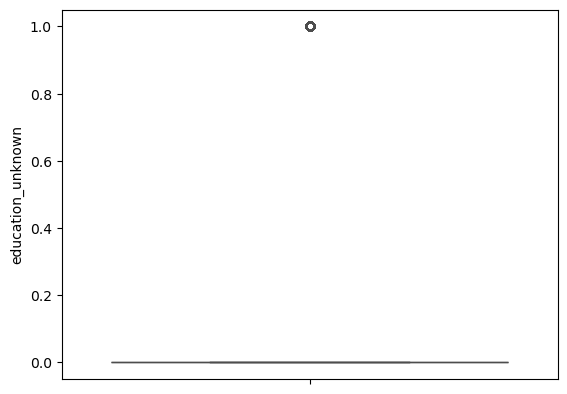

************************************default_no****************************************


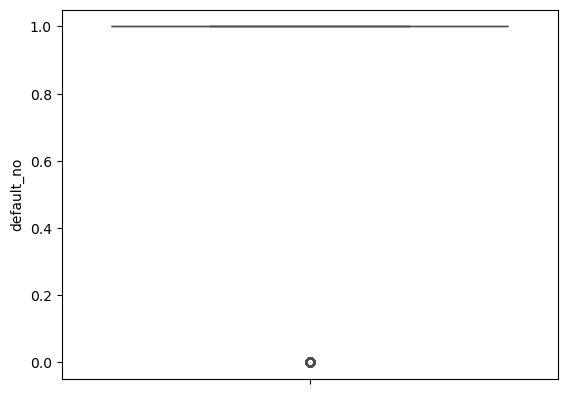

************************************default_unknown****************************************


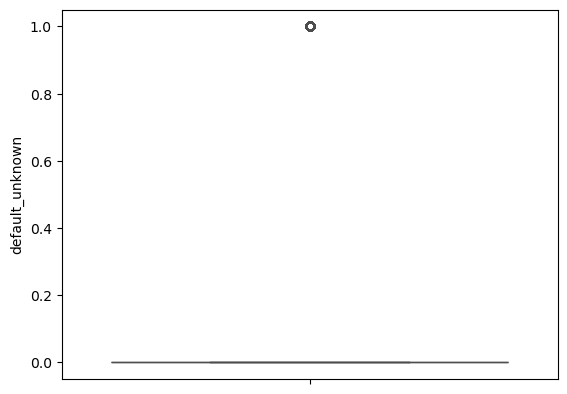

************************************default_yes****************************************


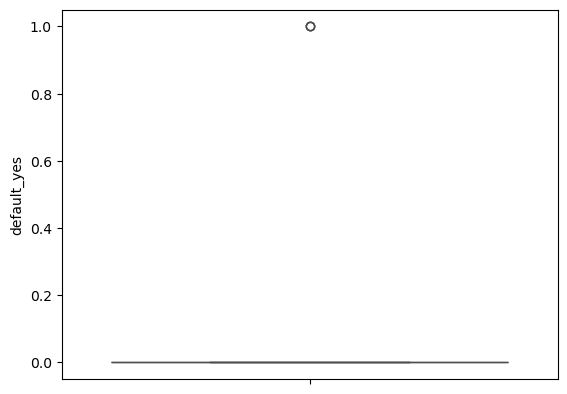

************************************housing_no****************************************


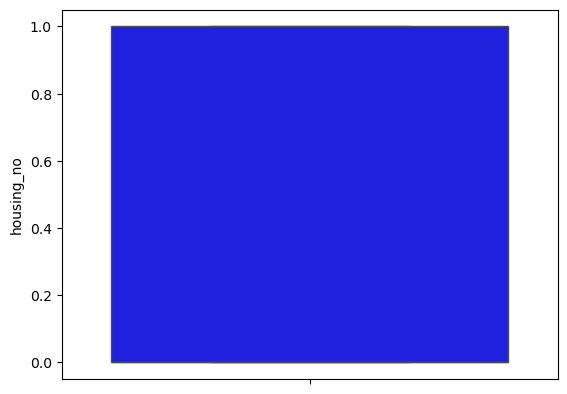

************************************housing_unknown****************************************


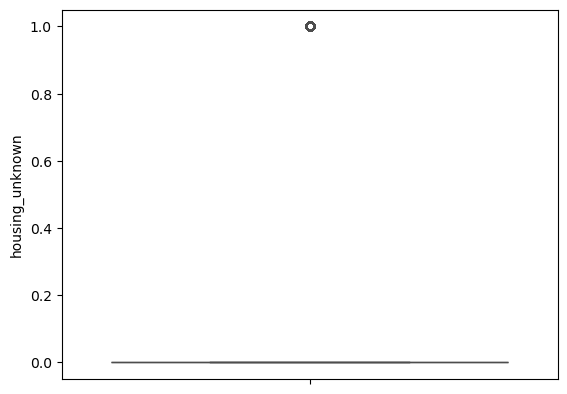

************************************housing_yes****************************************


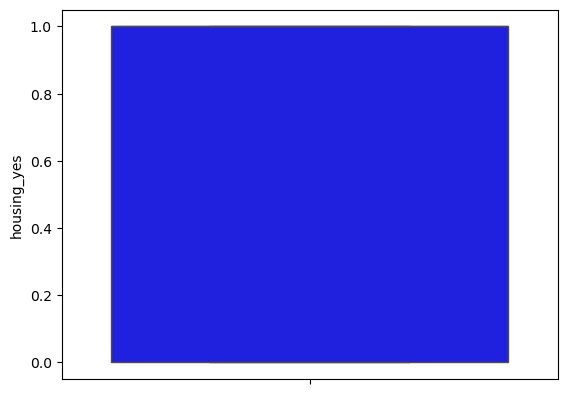

************************************loan_no****************************************


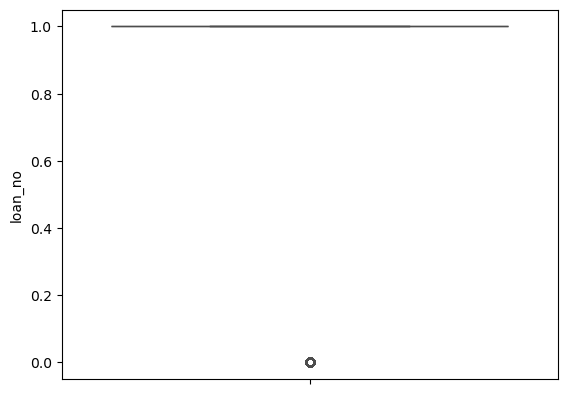

************************************loan_unknown****************************************


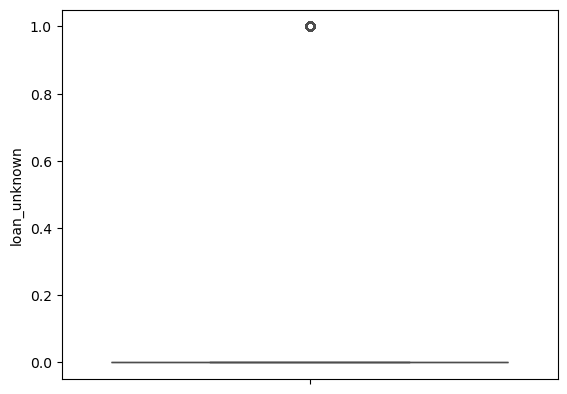

************************************loan_yes****************************************


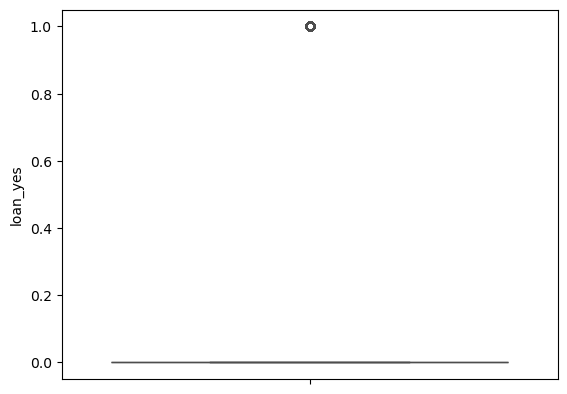

************************************contact_cellular****************************************


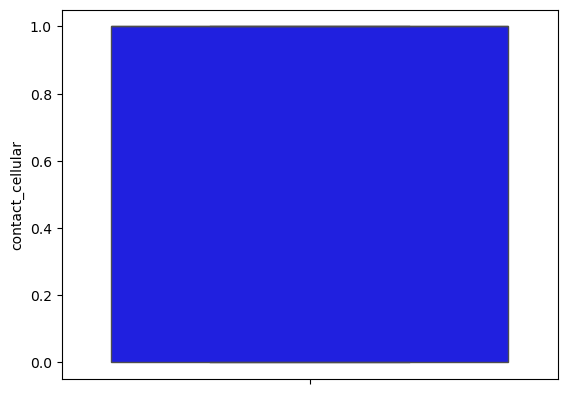

************************************contact_telephone****************************************


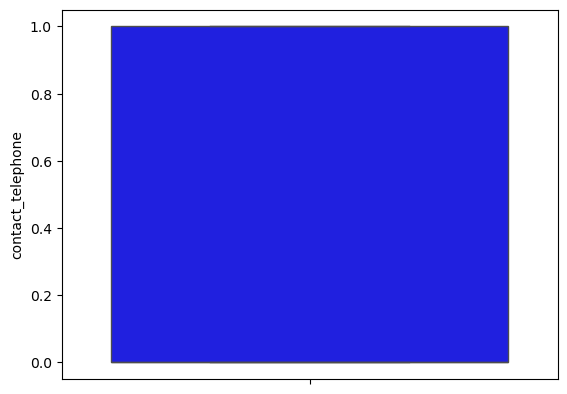

************************************month_apr****************************************


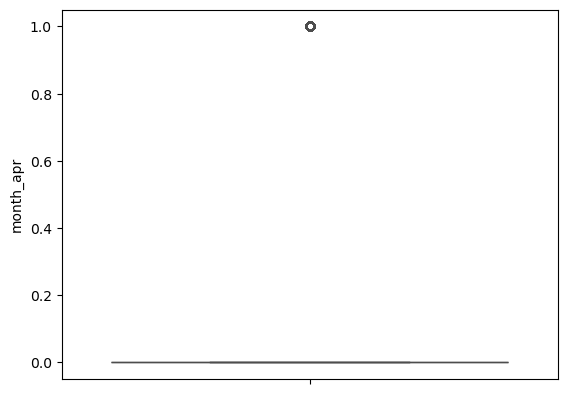

************************************month_aug****************************************


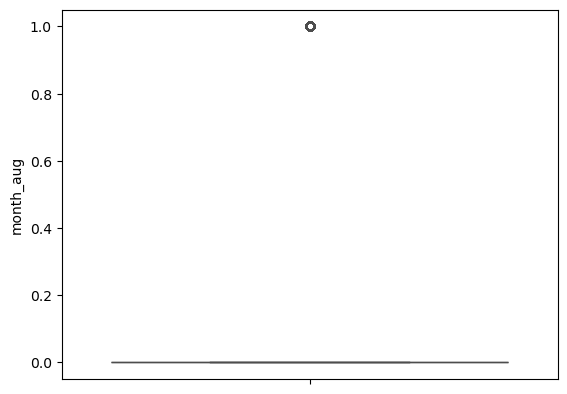

************************************month_dec****************************************


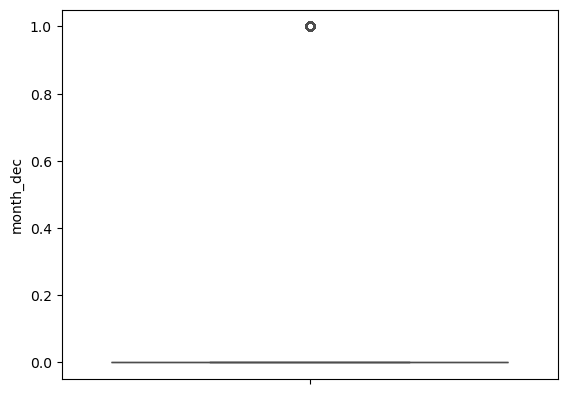

************************************month_jul****************************************


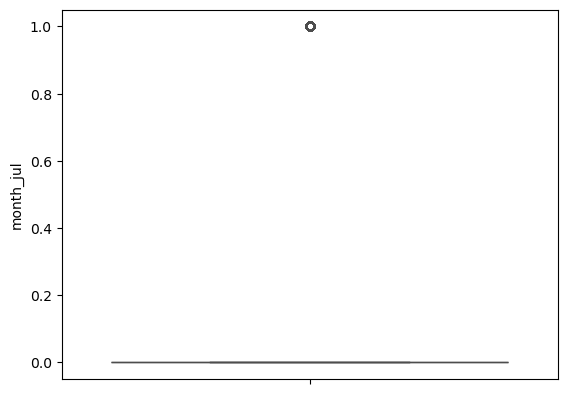

************************************month_jun****************************************


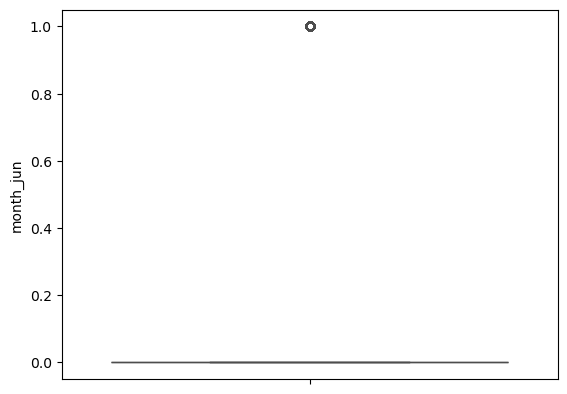

************************************month_mar****************************************


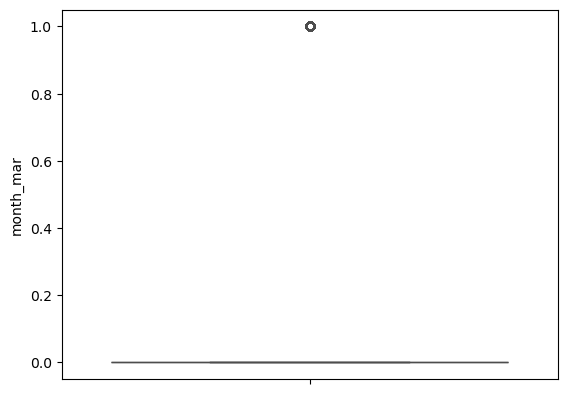

************************************month_may****************************************


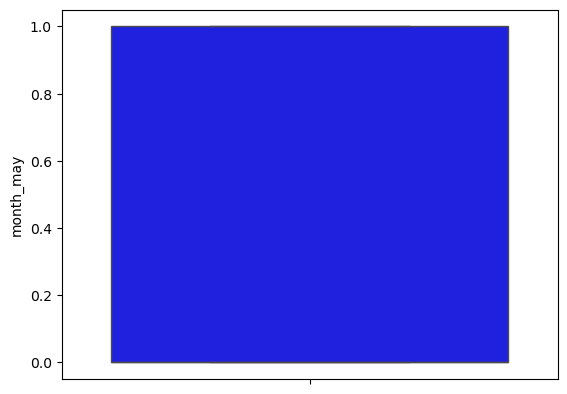

************************************month_nov****************************************


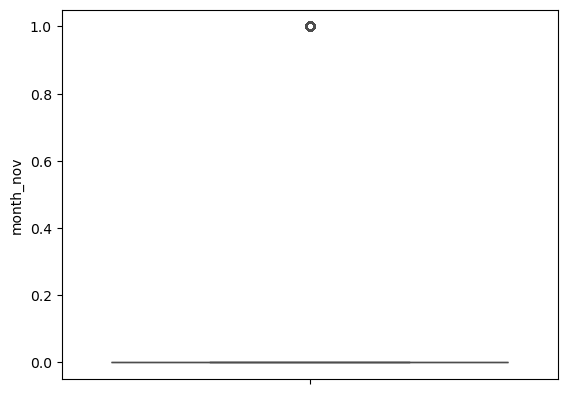

************************************month_oct****************************************


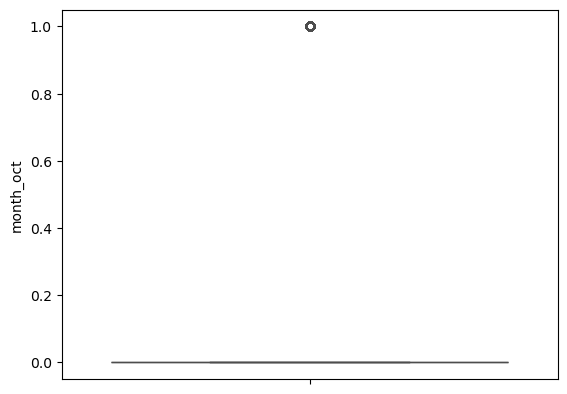

************************************month_sep****************************************


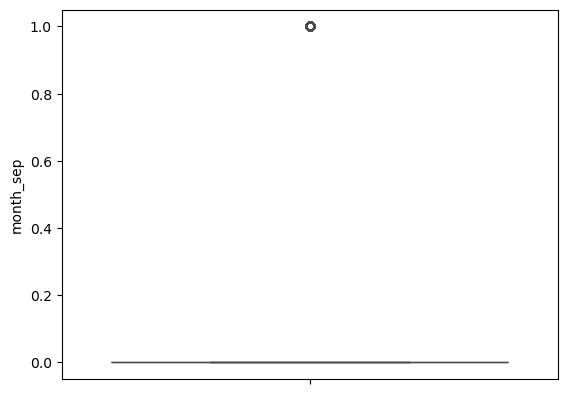

************************************day_of_week_fri****************************************


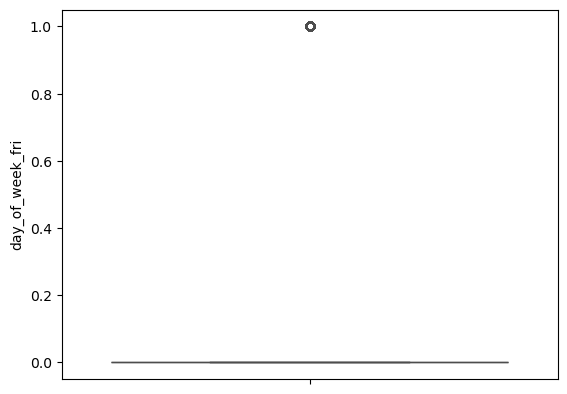

************************************day_of_week_mon****************************************


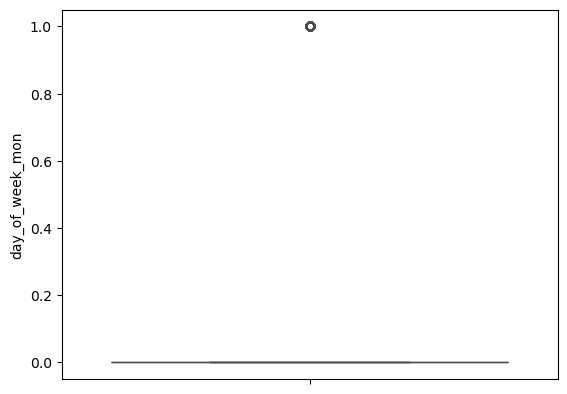

************************************day_of_week_thu****************************************


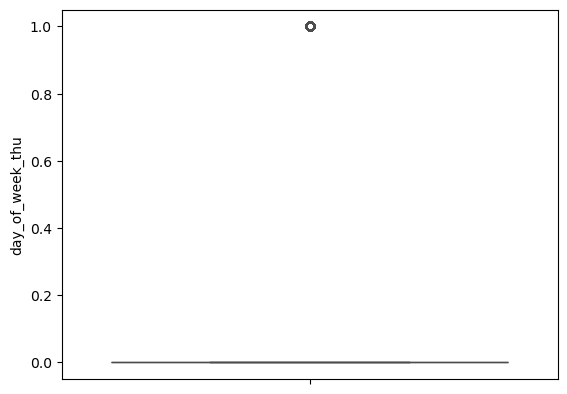

************************************day_of_week_tue****************************************


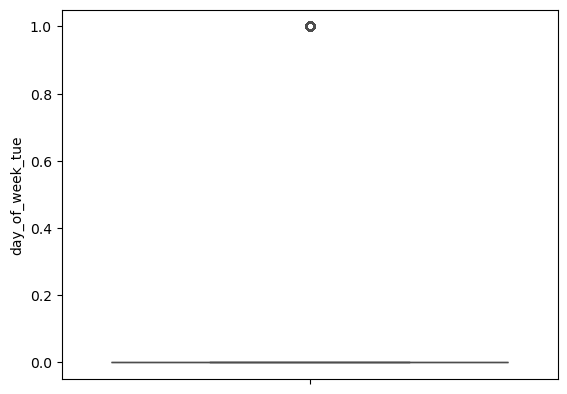

************************************day_of_week_wed****************************************


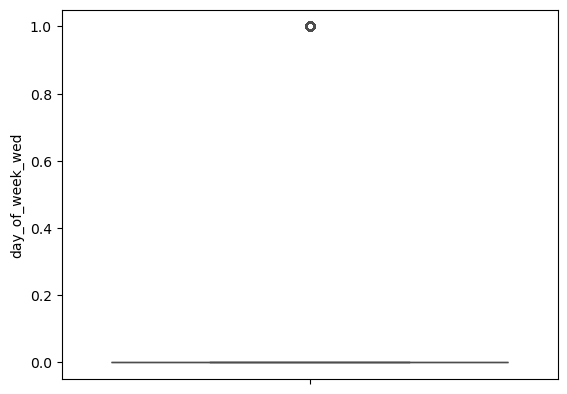

************************************poutcome_failure****************************************


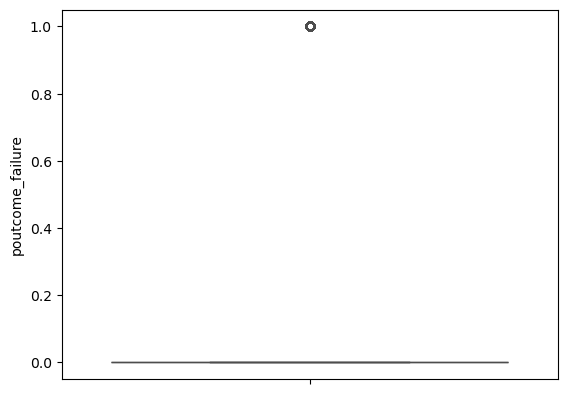

************************************poutcome_nonexistent****************************************


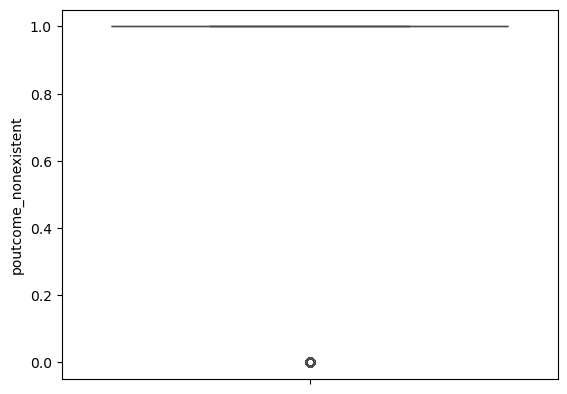

************************************poutcome_success****************************************


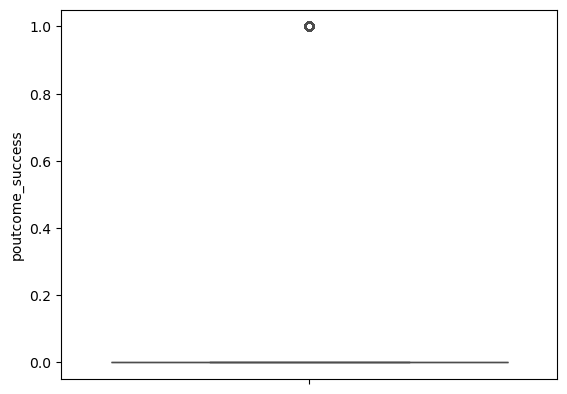

In [4]:
for i in df.columns:
    if i=='Loan_Status_label':
        pass
    else:
        print(f'************************************{i}****************************************')
        sns.boxplot(df[i],color = 'b')
    plt.show()

#INTER QUARTILE RANGE

In [28]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(f'Q1- \n {Q1} \n')
print(f'Q3- \n {Q3} \n')
print(f'IQR- \n {IQR}\ n')

Q1- 
 age                               32.0
campaign                           1.0
pdays                            999.0
previous                           0.0
no_previous_contact                1.0
not_working                        0.0
job_admin.                         0.0
job_blue-collar                    0.0
job_entrepreneur                   0.0
job_housemaid                      0.0
job_management                     0.0
job_retired                        0.0
job_self-employed                  0.0
job_services                       0.0
job_student                        0.0
job_technician                     0.0
job_unemployed                     0.0
job_unknown                        0.0
marital_divorced                   0.0
marital_married                    0.0
marital_single                     0.0
marital_unknown                    0.0
education_basic.4y                 0.0
education_basic.6y                 0.0
education_basic.9y                 0.0
education_high.scho

In [34]:
lower_limit = (Q1-1.5*IQR)
upper_limit = (Q3+1.5*IQR)
print(f' Lower_limit = \n{lower_limit} \n')
print(f'Upper_limit = \n{upper_limit} \n')

 Lower_limit = 
age                                9.5
campaign                          -2.0
pdays                            999.0
previous                           0.0
no_previous_contact                1.0
not_working                        0.0
job_admin.                        -1.5
job_blue-collar                    0.0
job_entrepreneur                   0.0
job_housemaid                      0.0
job_management                     0.0
job_retired                        0.0
job_self-employed                  0.0
job_services                       0.0
job_student                        0.0
job_technician                     0.0
job_unemployed                     0.0
job_unknown                        0.0
marital_divorced                   0.0
marital_married                   -1.5
marital_single                    -1.5
marital_unknown                    0.0
education_basic.4y                 0.0
education_basic.6y                 0.0
education_basic.9y                 0.0
education

In [35]:
df.shape

(41188, 60)

In [36]:
df[~((df<lower_limit) | (df>upper_limit)).any(axis=1)]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label


In [66]:
df.shape

(0, 60)

AS it drops all rows so I am only showing it how to do it rather than make it permananent..

In [5]:
df

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
41184,46,1,999,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


The blank graph shows that all the rows has some outliers and by the help of IQR we remove all of those...

#Feature Selection

In [6]:
df.corr()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
age,1.000000,0.004594,-0.034369,0.024365,-0.034292,0.207547,-0.102584,-0.024191,0.031213,0.085403,...,0.040889,0.007148,0.019027,-0.021356,0.019137,-0.023671,-0.002537,-0.016376,0.035626,0.030399
campaign,0.004594,1.000000,0.052584,-0.079141,0.052569,-0.017529,0.011745,-0.001775,-0.002203,0.004226,...,-0.033953,0.026641,0.014405,0.005141,-0.025125,-0.021088,-0.068890,0.087645,-0.050893,-0.066357
pdays,-0.034369,0.052584,1.000000,-0.587514,0.999992,-0.112797,-0.025398,0.065335,0.019246,-0.001649,...,-0.154629,0.013782,0.001031,-0.008186,-0.007300,0.001021,0.006354,0.491353,-0.950700,-0.324914
previous,0.024365,-0.079141,-0.587514,1.000000,-0.587462,0.104066,0.018888,-0.054845,-0.013239,-0.011569,...,0.157651,0.004404,-0.002012,0.001512,0.000090,-0.003929,0.682608,-0.878776,0.524045,0.230181
no_previous_contact,-0.034292,0.052569,0.999992,-0.587462,1.000000,-0.112795,-0.025412,0.065328,0.019247,-0.001638,...,-0.154616,0.013775,0.001009,-0.008187,-0.007282,0.001033,0.006104,0.491357,-0.950283,-0.324877
not_working,0.207547,-0.017529,-0.112797,0.104066,-0.112795,1.000000,-0.180369,-0.166824,-0.059324,-0.050367,...,0.085305,0.002009,-0.005305,-0.002442,0.008890,-0.002960,0.032294,-0.083051,0.104134,0.121246
job_admin.,-0.102584,0.011745,-0.025398,0.018888,-0.025412,-0.180369,1.000000,-0.313313,-0.111417,-0.094595,...,0.010407,0.009892,-0.000736,-0.003970,-0.001835,-0.003112,0.002771,-0.015560,0.025069,0.031426
job_blue-collar,-0.024191,-0.001775,0.065335,-0.054845,0.065328,-0.166824,-0.313313,1.000000,-0.103050,-0.087492,...,-0.054309,0.003329,-0.009754,-0.007062,-0.006829,0.020673,-0.013254,0.043843,-0.061403,-0.074423
job_entrepreneur,0.031213,-0.002203,0.019246,-0.013239,0.019247,-0.059324,-0.111417,-0.103050,1.000000,-0.031113,...,-0.009172,-0.001905,0.006828,0.005551,-0.007275,-0.003480,0.001595,0.007598,-0.017238,-0.016644
job_housemaid,0.085403,0.004226,-0.001649,-0.011569,-0.001638,-0.050367,-0.094595,-0.087492,-0.031113,1.000000,...,-0.003503,-0.007595,0.003365,-0.009014,0.011500,0.001797,-0.017853,0.014629,0.002276,-0.006505


In [7]:
df.head(10)

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5,45,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
6,59,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
7,41,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
8,24,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
9,25,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [8]:
df.tail()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
41183,73,1,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
41184,46,1,999,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
41187,74,3,999,1,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


<Axes: >

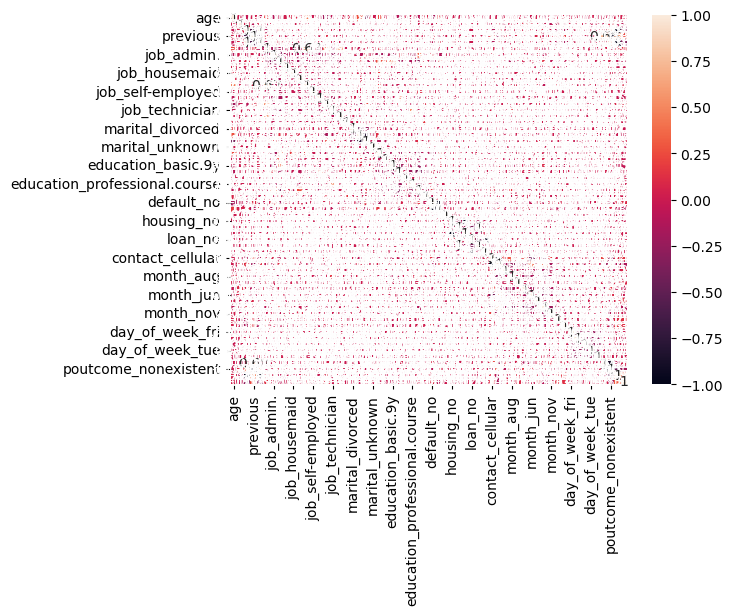

In [10]:
sns.heatmap(df.corr(),annot = True)

#MODEL BUILDING

In [22]:
df

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
41184,46,1,999,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [23]:
x = df.iloc[:,:-1]
x

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [24]:
y = df['Loan_Status_label']
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: Loan_Status_label, Length: 41188, dtype: int64

In [25]:
 x_train, x_test, y_train, y_test = train_test_split(    x, y, test_size=0.2, random_state=42)

Here we split our data into train and test form by dividing it into 80:20

In [26]:
x_train

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
12556,40,2,999,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
35451,31,4,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
30592,59,6,999,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
17914,43,5,999,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3315,39,2,999,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,58,2,999,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
11284,37,1,999,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
38158,35,1,4,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
860,40,2,999,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [27]:
x_test

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
32884,57,1,999,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3169,55,2,999,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32206,33,1,999,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
9403,36,4,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
14020,27,2,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12322,27,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
23440,41,7,999,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
29431,46,12,999,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
16627,31,2,999,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [28]:
y_train

12556    0
35451    0
30592    0
17914    0
3315     0
        ..
6265     0
11284    0
38158    1
860      0
15795    0
Name: Loan_Status_label, Length: 32950, dtype: int64

In [29]:
y_test

32884    0
3169     0
32206    0
9403     0
14020    0
        ..
12322    1
23440    0
29431    0
16627    1
1871     0
Name: Loan_Status_label, Length: 8238, dtype: int64

#USING LINEAR REGRESSION

In [31]:
lr  = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
print(f'Training Accuracy: {lr.score(x_train,y_train)}')
print(f'Test Accuracy: {lr.score(x_test,y_test)}')

Training Accuracy: 0.17214830947233095
Test Accuracy: 0.15093060187489082


USING DECISION TREE

In [58]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [59]:
print(f'Training Accuracy: {dt.score(x_train,y_train)}')
print(f'Test Accuracy: {dt.score(x_test,y_test)}')

Training Accuracy: 0.9014264036418816
Test Accuracy: 0.8945132313668366


#USING GRADIENT BOOSTING

In [55]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [56]:
print(f'Training Accuracy: {gb.score(x_train,y_train)}')
print(f'Test Accuracy: {gb.score(x_test,y_test)}')

Training Accuracy: 0.9020030349013657
Test Accuracy: 0.896698227725176


#USING XGBOOST

In [52]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
print(f'Training Accuracy: {xgb.score(x_train,y_train)}')
print(f'Test Accuracy: {xgb.score(x_test,y_test)}')

Training Accuracy: 0.9216995447647951
Test Accuracy: 0.8929351784413693


#Using RANDOM FOREST

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rf  = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [49]:
print(f'Training Accuracy: {rf.score(x_train,y_train)}')
print(f'Test Accuracy: {rf.score(x_test,y_test)}')

Training Accuracy: 0.8513184232842865
Test Accuracy: 0.07195261206994874


Hence the classfier model give us the best training and test accuracy so we will go with it further..

#MODEL PREDICTION

Decision Tree

In [67]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

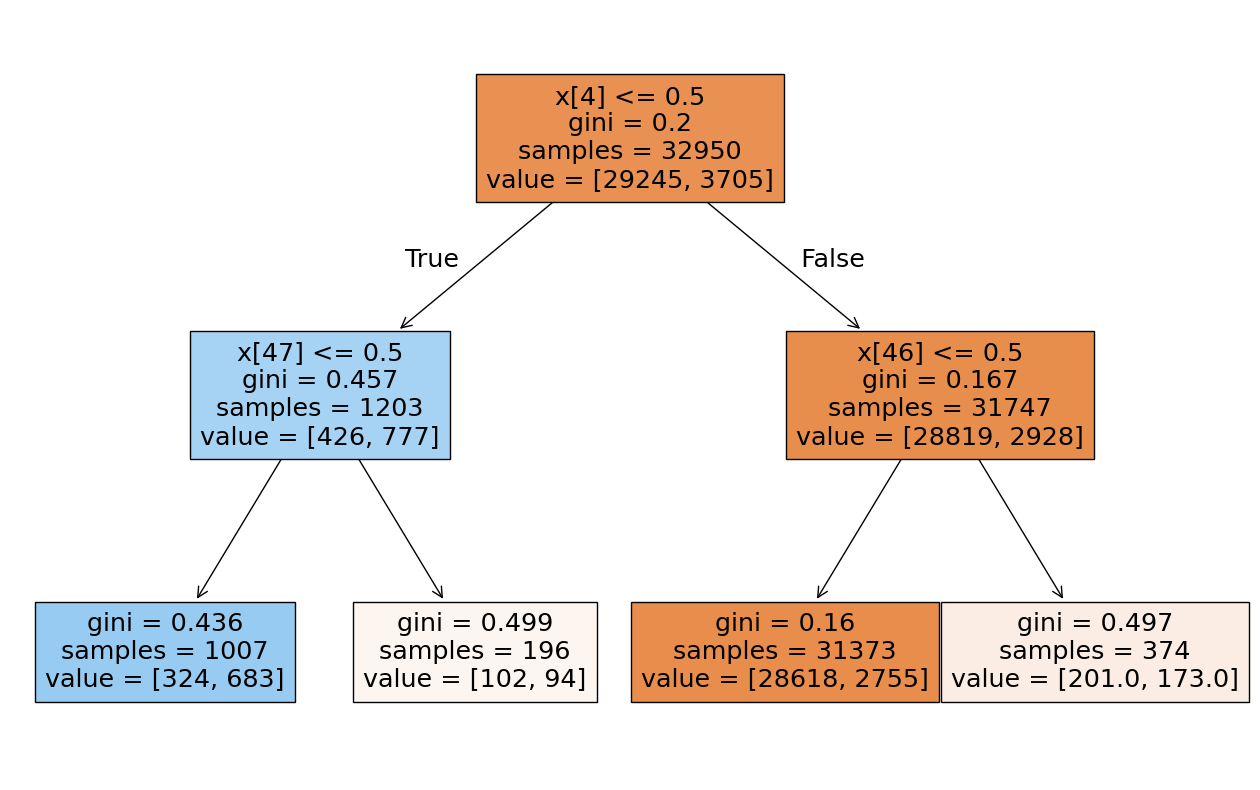

In [68]:
from sklearn import tree
plt.figure(figsize=(16,10))
tree.plot_tree(dt,filled = True)
plt.show()

In [69]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

In [70]:
y_train[:5]

12556    0
35451    0
30592    0
17914    0
3315     0
Name: Loan_Status_label, dtype: int64

In [71]:
y_pred_train[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [72]:
confusion_matrix(y_train,y_pred_train)

array([[28921,   324],
       [ 3022,   683]], dtype=int64)

In [73]:
accuracy_score(y_train,y_pred_train)

0.8984522003034902

In [75]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     29245
           1       0.68      0.18      0.29      3705

    accuracy                           0.90     32950
   macro avg       0.79      0.59      0.62     32950
weighted avg       0.88      0.90      0.87     32950



<Axes: >

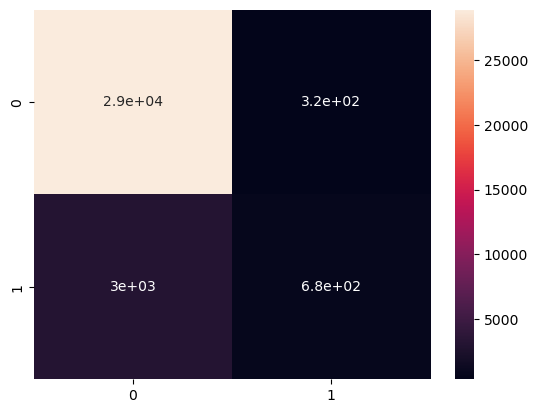

In [76]:
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot  =True)

<Axes: >

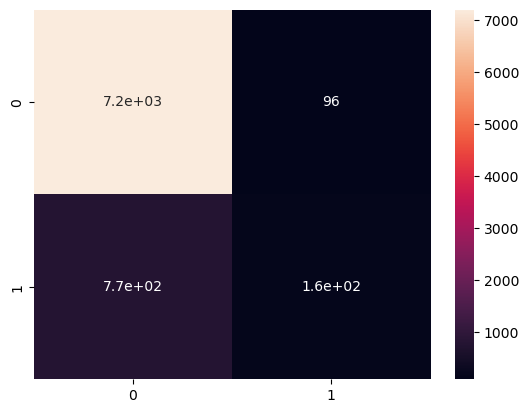

In [77]:
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot  =True)

In [78]:
accuracy_score(y_test,y_pred_test)

0.8947560087399854

Hence it give accuracy 89% to both training and test data whicit is good ..

#Using Gradient Boosting

In [80]:
y_pred_train = gb.predict(x_train)
y_pred_test = gb.predict(x_test)

In [81]:
confusion_matrix(y_train,y_pred_train)

array([[28913,   332],
       [ 2897,   808]], dtype=int64)

In [82]:
accuracy_score(y_train,y_pred_train)

0.9020030349013657

In [83]:
accuracy_score(y_test,y_pred_test)

0.896698227725176

<Axes: >

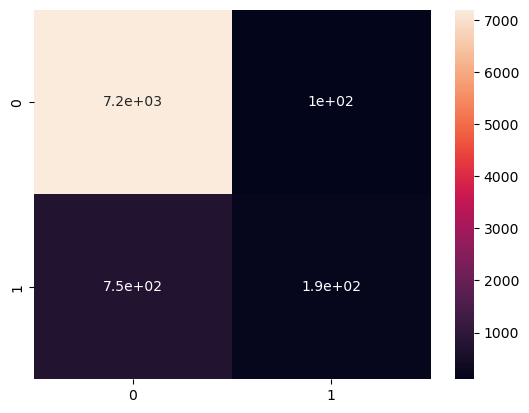

In [84]:
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot  =True)

Hence it give accuracy 90% to training and 89% to test data whicit is good ..

In [85]:
y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

In [86]:
confusion_matrix(y_train,y_pred_train)

array([[29028,   217],
       [ 2363,  1342]], dtype=int64)

In [87]:
accuracy_score(y_train,y_pred_train)

0.9216995447647951

In [88]:
accuracy_score(y_test,y_pred_test)

0.8929351784413693

<Axes: >

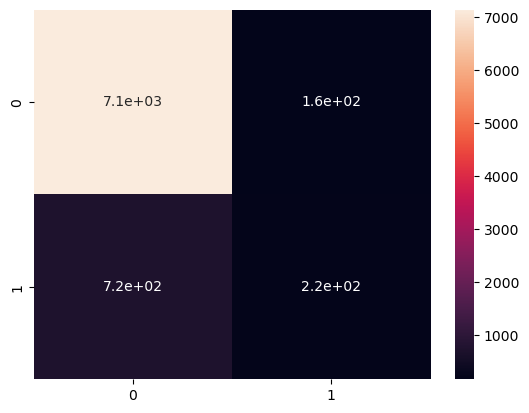

In [89]:
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot  =True)

Hence it gives the bets accuracy to training data which is 92% and 89% to test data..

#using Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier
rf  = RandomForestClassifier(oob_score = True,random_state = 42)
rf.fit(x_train,y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [99]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

In [100]:
accuracy_score(y_train,y_pred_train)

0.993474962063733

In [101]:
accuracy_score(y_test,y_pred_test)

0.8871085214857976

In [102]:
rf.oob_score_

0.8876479514415782